# Setup

In [1]:
# setup
import io
import base64
import sys
import glob
import errno
from collections import defaultdict
from os import listdir

import numpy as np
import h5py
import scipy as sp
import itertools
import multiprocessing as mproc
import pandas as pd
import tensorflow as tf

%reload_ext autoreload
%autoreload 2

from IPython.display import display, HTML, Math, Latex
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#%matplotlib notebook
    
# mpl.rcParams['text.usetex'] = 'True'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1.2
mpl.rcParams['ytick.minor.width'] = 1.2
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['legend.fontsize'] = 25
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.serif'] = 'Computer Modern'
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#ad494a'
violet = '#9467bd'
brown = '#8c564b'

# Binary classification

In [2]:
# setup
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Sample dataset (binary classification)
data = {
    'feature1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'feature2': [0.5, 0.4, 0.3, 0.2, 0.1],
    'label': [0, 0, 1, 1, 1]  # Binary labels
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (X) and Labels (y)
X = df[['feature1', 'feature2']].values  # Input features
y = df['label'].values  # Output labels

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layer
model.add(Dense(8, input_dim=2, activation='relu'))  # 2 input features, 8 neurons in hidden layer

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=0)
    
# Example input for prediction
test_data = np.array([[0.2, 0.4]])  # New input data
    
# Make a prediction
prediction = model.predict(test_data)
predicted_label = (prediction > 0.5).astype(int)  # Convert probability to binary output
print("Predicted label: ", predicted_label[0][0])

1/1 [==============================] - 0s 58ms/step
Predicted label:  0


# Single Layer Perceptron in TensorFlow

60000 10000 (28, 28)
Epoch 1/5
1875/1875 [==============================] - 1s 641us/step - loss: 0.4696 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
313/313 [==============================] - 0s 595us/step - loss: 0.2753 - accuracy: 0.9228


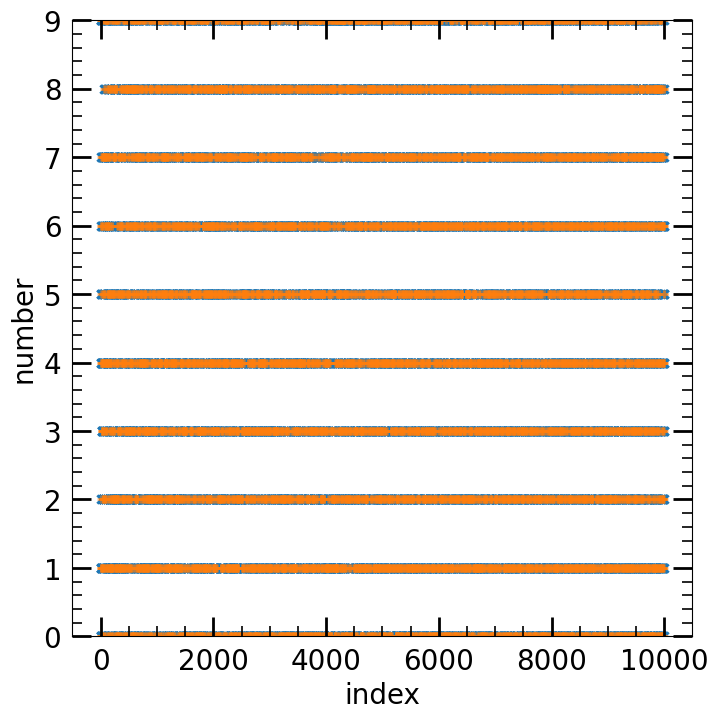

In [83]:
# load keras
from tensorflow import keras
(x_train, y_train),	(x_test, y_test) = keras.datasets.mnist.load_data()

# print
print(len(x_train), len(x_test), x_train[0].shape)
# print(y_train[0])
# mpl.rcParams['figure.figsize'] = 11, 8
# plt.matshow(x_train[1])
# plt.show()

# Normalizing the dataset 
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order 
# to compute for model building 
x_train_flatten = x_train.reshape(len(x_train), 28*28) 
x_test_flatten = x_test.reshape(len(x_test), 28*28) 

# y_test_new = np.zeros_like(prediction)
# y_test_new[np.arange(y_test.size), y_test] = 1

# train model
model = keras.Sequential([ keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') ]) 
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) 
model.fit(x_train_flatten, y_train, epochs=5)

# evaluate
prediction = np.argmax(model.predict(x_test_flatten), axis=1)
results = model.evaluate(x_test_flatten, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

# plot
mpl.rcParams['figure.figsize'] = 8, 8
plt.scatter(np.arange(y_test.size), y_test, color=blue, marker='x')
plt.scatter(np.arange(y_test.size), prediction, color=orange, marker='+', alpha=0.5)
plt.ylim([0, 9])
plt.xlabel('index')
plt.ylabel('number')
plt.show()

# Multi-Layer Perceptron Learning in Tensorflow

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


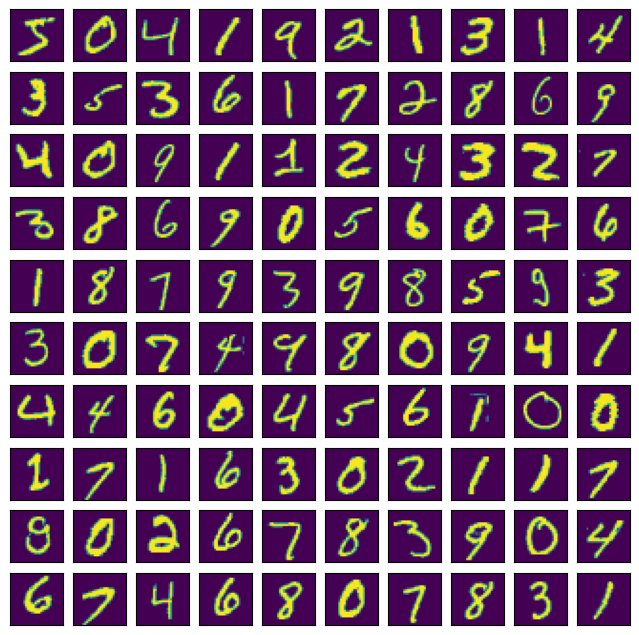

In [88]:
## Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        k += 1
plt.show()

In [93]:
# Building the Sequential neural network model
model = Sequential([
    # Flatten input from 28x28 images to 784 (28*28) vector
    Flatten(input_shape=(28, 28)),
  
    # Dense layer 1 (256 neurons)
    Dense(256, activation='sigmoid'),
  
    # Dense layer 2 (128 neurons)
    Dense(128, activation='sigmoid'),
  
    # Output layer (10 classes)
    Dense(10, activation='softmax'),
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with training data
model.fit(x_train, y_train, epochs=10,
          batch_size=2000, 
          validation_split=0.2)

# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Epoch 1/10
24/24 [==============================] - 1s 14ms/step - loss: 2.0870 - accuracy: 0.3585 - val_loss: 1.7376 - val_accuracy: 0.6202
Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 1.4050 - accuracy: 0.7232 - val_loss: 1.0555 - val_accuracy: 0.7997
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.8921 - accuracy: 0.8096 - val_loss: 0.7022 - val_accuracy: 0.8536
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6356 - accuracy: 0.8563 - val_loss: 0.5215 - val_accuracy: 0.8801
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 0.4954 - accuracy: 0.8813 - val_loss: 0.4212 - val_accuracy: 0.8985
Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 0.4145 - accuracy: 0.8959 - val_loss: 0.3636 - val_accuracy: 0.9068
Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 0.3650 - accuracy: 0.9038 - val_loss: 0.3273 - val_accuracy: 0.9137
Epoch 8/10
24/24 

# Forward propagation

In [ ]:
# Creating a dataset
df = pd.DataFrame([[8, 8, 4], [7, 9, 5], [6, 10, 6], [5, 12, 7]], columns=['cgpa', 'profile_score', 'lpa'])

# Initializing parameters
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for i in range(1, L):
        # parameters['W' + str(i)] = np.ones((layer_dims[i-1], layer_dims[i])) * 0.1
        # parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
        parameters['W' + str(i)] = np.random.rand(layer_dims[i-1], layer_dims[i])
        parameters['b' + str(i)] = np.random.rand(layer_dims[i], 1)
    return parameters

# Forward propagation
def linear_forward(A_prev, W, b):
    Z = np.dot(W.T, A_prev) + b
    return Z

def relu(Z):
    return np.maximum(0, Z)

def L_layer_forward(X, parameters):
    A = X
    caches = []
    L = len(parameters) // 2
    for i in range(1, L):
        A_prev = A
        W = parameters['W' + str(i)]
        b = parameters['b' + str(i)]
        Z = linear_forward(A_prev, W, b)
        A = relu(Z)
        cache = (A_prev, W, b, Z)
        caches.append(cache)

    # Output layer
    W_out = parameters['W' + str(L)]
    b_out = parameters['b' + str(L)]
    Z_out = linear_forward(A, W_out, b_out)
    AL = Z_out

    return AL, caches

# Example execution
X = df[['cgpa', 'profile_score']].values[0].reshape(2, 1)
parameters = initialize_parameters([2, 2, 1])
y_hat, caches = L_layer_forward(X, parameters)
print("Final output:")
print(y_hat)

# Stochastic Gradient Descent (SGD)

In [16]:
class SGD:
    def __init__(self, lr=0.001, epochs=2000, batch_size=32, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None

    def predict(self, X):
        # return tf.matmul(X, self.weights) + self.bias
        return tf.nn.relu(tf.matmul(X, self.weights) + self.bias)

    def mean_squared_error(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    def gradient(self, X_batch, y_batch):
        with tf.GradientTape() as tape:
            y_pred = self.predict(X_batch)
            loss = self.mean_squared_error(y_batch, y_pred)
        gradient_weights, gradient_bias = tape.gradient(loss, [self.weights, self.bias])
        return gradient_weights, gradient_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = tf.Variable(tf.random.normal((n_features, 1)))
        self.bias = tf.Variable(tf.random.normal(()))

        for epoch in range(self.epochs):
            indices = tf.random.shuffle(tf.range(n_samples))
            X_shuffled = tf.gather(X, indices)
            y_shuffled = tf.gather(y, indices)

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                # Gradient clipping
                gradient_weights = tf.clip_by_value(gradient_weights, -1, 1)
                gradient_bias = tf.clip_by_value(gradient_bias, -1, 1)
                
                self.weights.assign_sub(self.learning_rate * gradient_weights)
                self.bias.assign_sub(self.learning_rate * gradient_bias)

            if epoch % 100 == 0:
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {epoch}: Loss {loss}")

            if tf.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break

        return self.weights.numpy(), self.bias.numpy()

# Create random dataset with 100 rows and 5 columns
X = np.random.randn(100, 5).astype(np.float32)
# Create corresponding target value by adding random
# noise in the dataset
y = np.dot(X, np.array([1, 2, 3, 4, 5], dtype=np.float32)) + np.random.randn(100).astype(np.float32) * 0.1

# Create an instance of the SGD class
model = SGD(lr=0.005, epochs=1000, batch_size=20, tol=1e-3)
w, b = model.fit(X, y)

# Predict using predict method from model
y_pred = np.dot(X, w) + b

Epoch 0: Loss 70.94551086425781
Convergence reached.


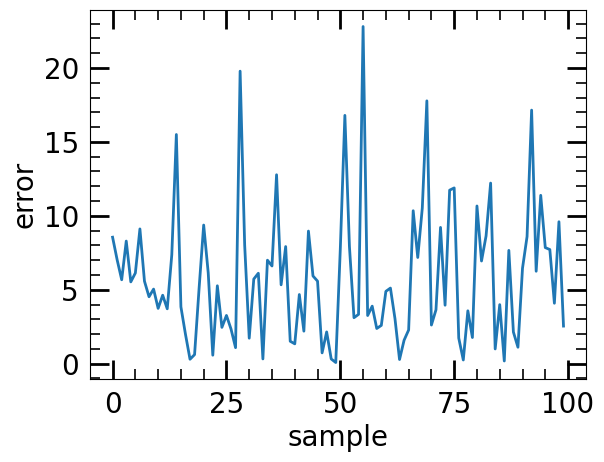

In [17]:
plt.plot(np.arange(y.size), np.abs(y-y_pred[:, 0]))
plt.xlabel('sample')
plt.ylabel('error')
plt.show()